In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

In [4]:
from pandas import *
from pylab import *

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


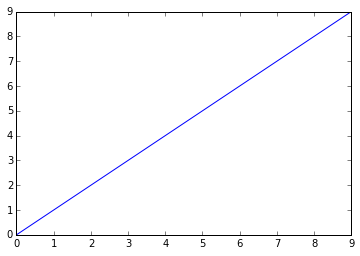

In [7]:
plt.plot(arange(10))

In [8]:
sample_annotation=read_table("j:/BlueBirdBio/DATA/MM millennium datasets/millennium_sample_info.txt")

In [10]:
sample_id=[sample for sample in sample_annotation.iteritems()][0]

In [12]:
sample_annotation.head()

   Sample ID  Study code   Treatment     Sex                    Race  \
0  MPM002090          40  Bortezomib    Male                   White   
1  MPM002091          40  Bortezomib  Female                   White   
2  MPM002092          40  Bortezomib  Female                   White   
3  MPM002097          40  Bortezomib  Female                   White   
4  MPM002104          40  Bortezomib    Male  Asian/Pacific Islander   

   Age at randomization Date of randomization Myeloma subtype  \
0                    55             20-Sep-02     Light chain   
1                    67             30-Sep-02             IgG   
2                    53             23-Sep-02             IgA   
3                    66             22-Oct-02             IgG   
4                    48             13-Aug-02             IgG   

  Response to treatment Responder      ...       \
0                    NC        NR      ...        
1                    NC        NR      ...        
2                    PR

In [13]:
sample=sample_annotation[['Sample ID','Response to treatment','Responder','death']]

In [14]:
data=read_table("j:/BlueBirdBio/DATA/MM millennium datasets/mulligan_et_al_mas5.gct",skiprows=[0,1])

In [16]:
goi=['TGFB1','TGFB2','TGFB3']

In [192]:
data_goi=data[data['Description'].isin(goi)]

In [204]:
data_goi

              Name Description  MPM002090  MPM002091  MPM002092  MPM002097  \
2612     203084_at       TGFB1   17.44711   10.60707    9.97518   13.17296   
2613   203085_s_at       TGFB1  111.70229  175.38358  160.90292  200.94611   
9234     209747_at       TGFB3  132.28601  129.92003  108.57371  103.65145   
9393   209908_s_at       TGFB2   29.85103   27.82430   19.52640   21.89530   
9394   209909_s_at       TGFB2    1.84034    2.52605    7.25182    2.72177   
19769    220406_at       TGFB2   55.66126   10.13891    9.48710   45.93821   
19770  220407_s_at       TGFB2   68.28698   31.93281   41.14301   20.04541   

       MPM002104  MPM002105  MPM002106  MPM002111    ...      MPR007446  \
2612    32.15286   14.07384    6.39628   11.14054    ...        8.81552   
2613   156.94405  181.91303  204.80713  134.44742    ...      108.40612   
9234   172.98982  105.55342  121.14122  201.90248    ...      128.69829   
9393    56.07945   21.86207   33.36821   41.83493    ...       66.81715   


In [205]:
grouped=data_goi.groupby(["Name","Description"]).sum()

In [206]:
grouped

                         MPM002090  MPM002091  MPM002092  MPM002097  \
Name        Description                                               
203084_at   TGFB1         17.44711   10.60707    9.97518   13.17296   
203085_s_at TGFB1        111.70229  175.38358  160.90292  200.94611   
209747_at   TGFB3        132.28601  129.92003  108.57371  103.65145   
209908_s_at TGFB2         29.85103   27.82430   19.52640   21.89530   
209909_s_at TGFB2          1.84034    2.52605    7.25182    2.72177   
220406_at   TGFB2         55.66126   10.13891    9.48710   45.93821   
220407_s_at TGFB2         68.28698   31.93281   41.14301   20.04541   

                         MPM002104  MPM002105  MPM002106  MPM002111  \
Name        Description                                               
203084_at   TGFB1         32.15286   14.07384    6.39628   11.14054   
203085_s_at TGFB1        156.94405  181.91303  204.80713  134.44742   
209747_at   TGFB3        172.98982  105.55342  121.14122  201.90248   
20990

In [207]:
stacked=grouped.stack()

In [208]:
#stack to make a multiple-indexed Series
stacked

Name         Description           
203084_at    TGFB1        MPM002090     17.44711
                          MPM002091     10.60707
                          MPM002092      9.97518
                          MPM002097     13.17296
                          MPM002104     32.15286
                          MPM002105     14.07384
                          MPM002106      6.39628
                          MPM002111     11.14054
                          MPM002123     14.69504
                          MPM002124      9.04155
                          MPM002125     14.32149
                          MPM002126     12.47660
                                         ...    
220407_s_at  TGFB2        MPR007444     26.59796
                          MPR007445     59.65236
                          MPR007446    119.07817
                          MPR007447     47.12748
                          MPR007449     56.64064
                          MPR007450     45.02154
                          MPR0074

In [209]:
#change the index names of Series
stacked.index.names=["Probe","Genes","Sample ID"]

In [210]:
stacked

Probe        Genes  Sample ID
203084_at    TGFB1  MPM002090     17.44711
                    MPM002091     10.60707
                    MPM002092      9.97518
                    MPM002097     13.17296
                    MPM002104     32.15286
                    MPM002105     14.07384
                    MPM002106      6.39628
                    MPM002111     11.14054
                    MPM002123     14.69504
                    MPM002124      9.04155
                    MPM002125     14.32149
                    MPM002126     12.47660
                                   ...    
220407_s_at  TGFB2  MPR007444     26.59796
                    MPR007445     59.65236
                    MPR007446    119.07817
                    MPR007447     47.12748
                    MPR007449     56.64064
                    MPR007450     45.02154
                    MPR007451     61.90097
                    MPR007453     10.02567
                    MPR007454     83.82836
                    MPR0

In [211]:
#reset index and automatically flat the multiple-index Series into dataframe
stacked=stacked.reset_index()

In [212]:
stacked

            Probe  Genes  Sample ID          0
0       203084_at  TGFB1  MPM002090   17.44711
1       203084_at  TGFB1  MPM002091   10.60707
2       203084_at  TGFB1  MPM002092    9.97518
3       203084_at  TGFB1  MPM002097   13.17296
4       203084_at  TGFB1  MPM002104   32.15286
5       203084_at  TGFB1  MPM002105   14.07384
6       203084_at  TGFB1  MPM002106    6.39628
7       203084_at  TGFB1  MPM002111   11.14054
8       203084_at  TGFB1  MPM002123   14.69504
9       203084_at  TGFB1  MPM002124    9.04155
10      203084_at  TGFB1  MPM002125   14.32149
11      203084_at  TGFB1  MPM002126   12.47660
...           ...    ...        ...        ...
1836  220407_s_at  TGFB2  MPR007444   26.59796
1837  220407_s_at  TGFB2  MPR007445   59.65236
1838  220407_s_at  TGFB2  MPR007446  119.07817
1839  220407_s_at  TGFB2  MPR007447   47.12748
1840  220407_s_at  TGFB2  MPR007449   56.64064
1841  220407_s_at  TGFB2  MPR007450   45.02154
1842  220407_s_at  TGFB2  MPR007451   61.90097
1843  220407_

In [213]:
stacked=stacked.rename(columns = {0:'Expression'})

In [220]:
#Joining two dataframes
data_merge=stacked.merge(sample_annotation, how='inner',on="Sample ID")

In [222]:
data_merge

            Probe  Genes  Sample ID  Expression  Study code      Treatment  \
0       203084_at  TGFB1  MPM002090    17.44711          40     Bortezomib   
1     203085_s_at  TGFB1  MPM002090   111.70229          40     Bortezomib   
2       209747_at  TGFB3  MPM002090   132.28601          40     Bortezomib   
3     209908_s_at  TGFB2  MPM002090    29.85103          40     Bortezomib   
4     209909_s_at  TGFB2  MPM002090     1.84034          40     Bortezomib   
5       220406_at  TGFB2  MPM002090    55.66126          40     Bortezomib   
6     220407_s_at  TGFB2  MPM002090    68.28698          40     Bortezomib   
7       203084_at  TGFB1  MPM002091    10.60707          40     Bortezomib   
8     203085_s_at  TGFB1  MPM002091   175.38358          40     Bortezomib   
9       209747_at  TGFB3  MPM002091   129.92003          40     Bortezomib   
10    209908_s_at  TGFB2  MPM002091    27.82430          40     Bortezomib   
11    209909_s_at  TGFB2  MPM002091     2.52605          40     

In [223]:
data_merge.to_csv("pandas_results.txt",index=False, sep='\t')